<a href="https://colab.research.google.com/github/anhhaibkhn/LeetCode_Daily_Challenges/blob/master/JuneLeetCodePart1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

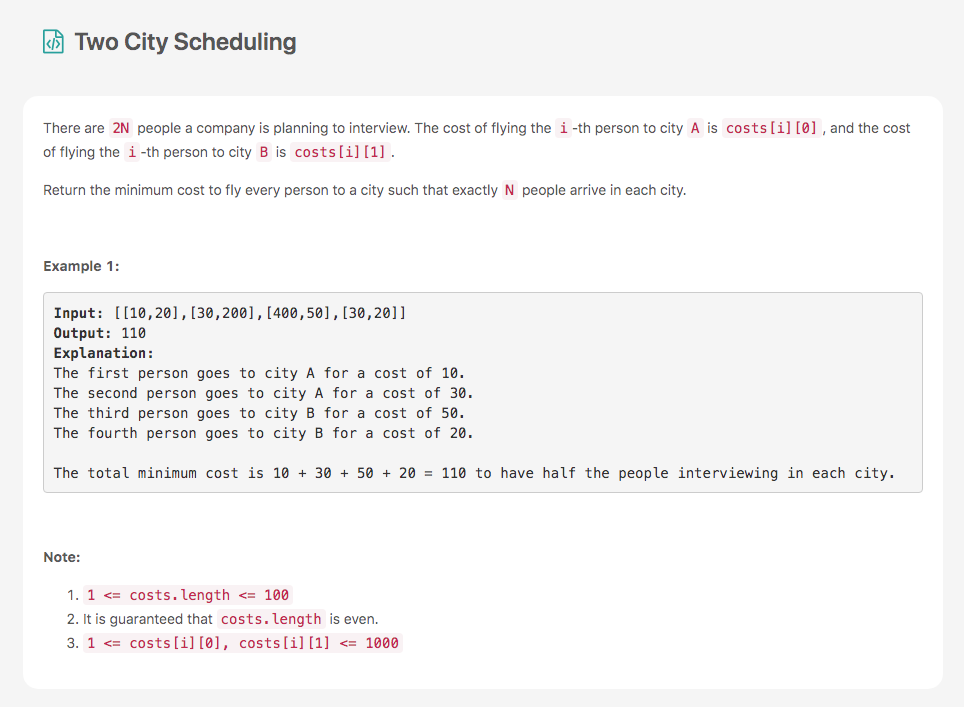

In [0]:
class Solution:
    def twoCitySchedCost(self, costs: List[List[int]]) -> int:
        costs.sort(key=lambda C: C[0] - C[1]) ### This is the core
        print(costs)
        print([costs[i][0] - costs[i][1] for i in range(len(costs))])
        N = len(costs)//2               
        return sum(a for a , _ in costs[:N]) + sum( b for _,b in costs[N:])



In [0]:
# June 04,
'''reverse array, just loop and change in place until length//2 '''

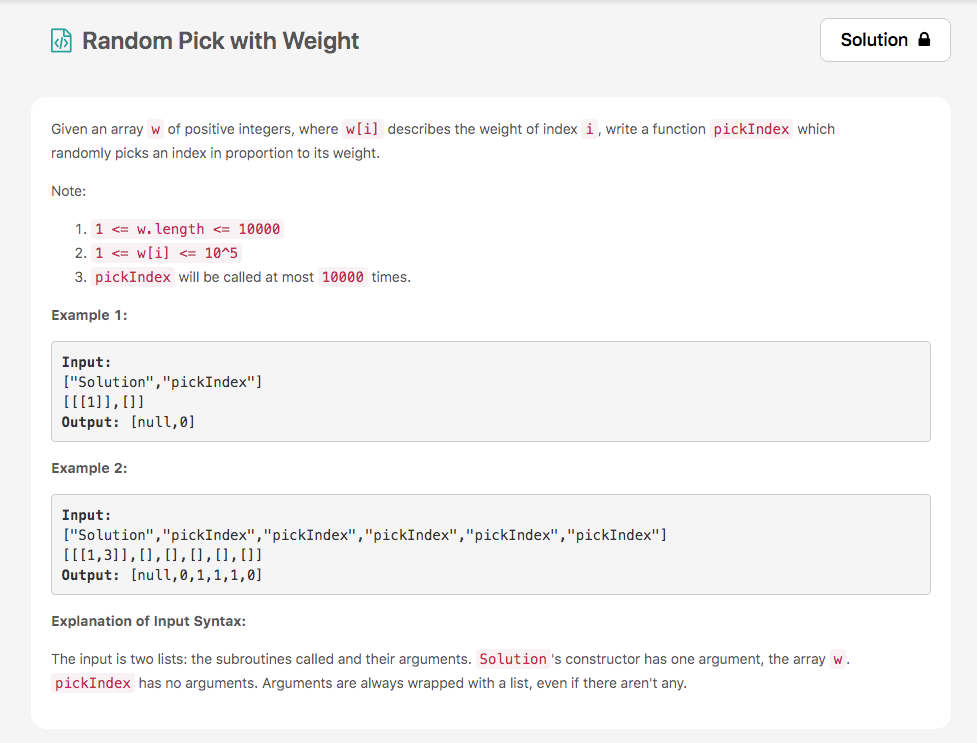

In [0]:
# June 05  Random pick weight 

from bisect import bisect_left
from random import random

class Solution:

    def __init__(self, w: List[int]):
        wSum = sum(w)
        currSum = 0
        self.list = []
        for i in w:
            currSum += i / wSum
            self.list.append(currSum)
            
    def pickIndex(self) -> int:
        return bisect_left(self.list, random())

In [0]:
# PHone solution 

import random, bisect
class Solution:

    def __init__(self, w: List[int]):
        self.save = []
        total = 0
        for weight in w:
            total += weight
            self.save.append(total)
        

    def pickIndex(self) -> int:
        random_number = random.randint(1,self.save[-1])
        return bisect.bisect_left(self.save,random_number)
        
        


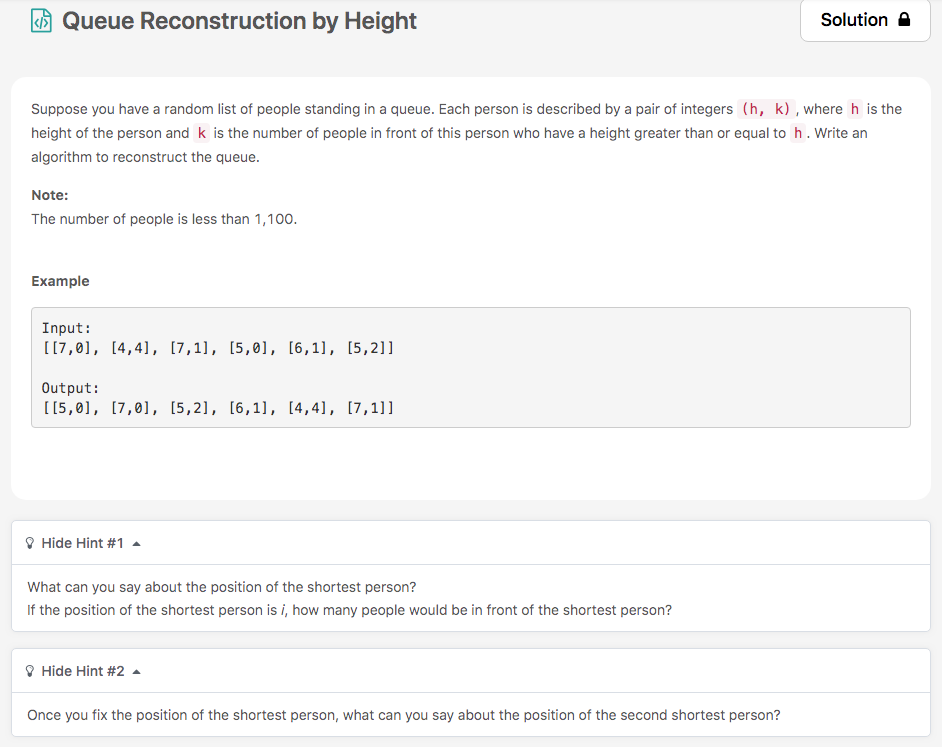

In [0]:
# June 6 Queue Reconstruction

# phone solution 

class Solution:
    def reconstructQueue(self, people: List[List[int]]) -> List[List[int]]:
        # reconstruct = [[None,None] for  i in range(len(people))]
        reconstruct = []
        # people.sort(key=lambda x: x[0], reverse = True)
        Heights_dict = defaultdict(list)
        
        for h, num in people:
            Heights_dict[h].append(num)
            
        # all height, then sort them
        heights = list(Heights_dict.keys())
        heights.sort(reverse = True)
        
        for h in heights:
            Heights_dict[h].sort()
            for num in Heights_dict[h]:
                reconstruct.insert(num,[h,num])    
        
        return reconstruct
        

In [0]:
# 80 ms 

class Solution:         
    def reconstructQueue(self, people: List[List[int]]) -> List[List[int]]:
        people.sort(key = lambda person: (person[0], -person[1]))
        people.reverse()
        queue = []
        for person in people:
            queue.insert(person[1],person)
        return queue


# 90 ms

class Solution:
    def reconstructQueue(self, people: List[List[int]]) -> List[List[int]]:
        
        '''
        Sort, greedy

        Space: O(1)
        Time: O(n^2)
        '''
        
        n = len(people)
        # Sort people in reverse order based on height(primary key) and -k(secondary key).
        people.sort(key=lambda x: x[0] * n - x[1], reverse=True)

        # For each people in sorted array, insert it into result array at position people[1].
        ans = []
        for p in people:
            ans.insert(p[1], p)

        return ans 

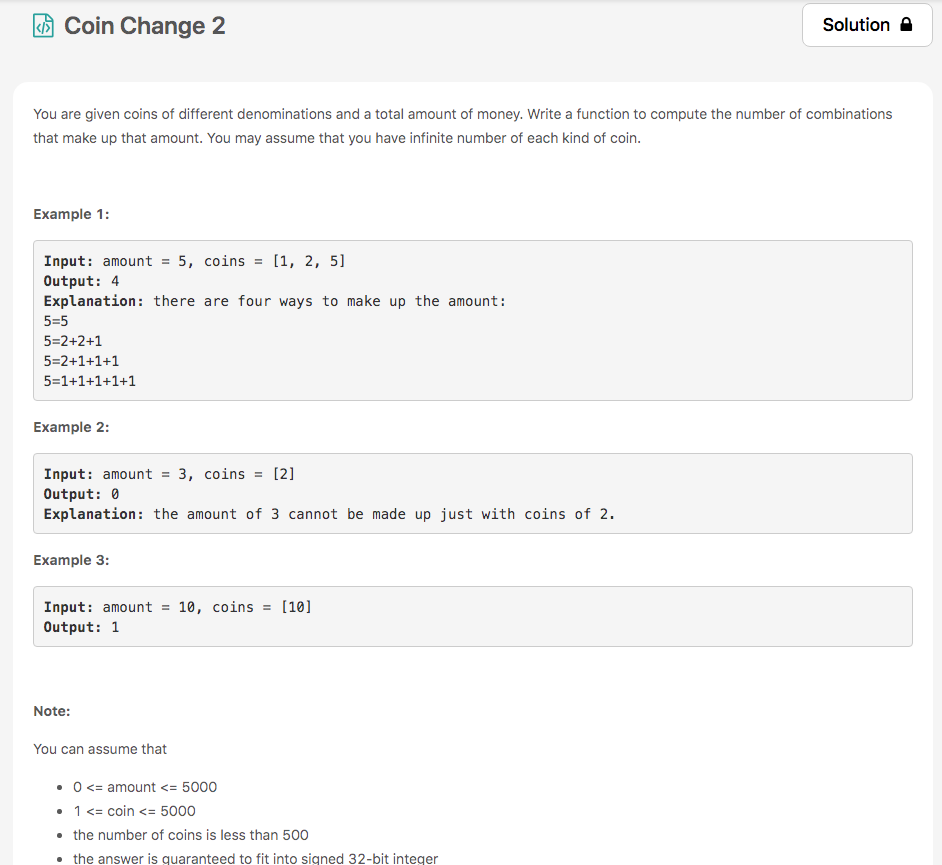

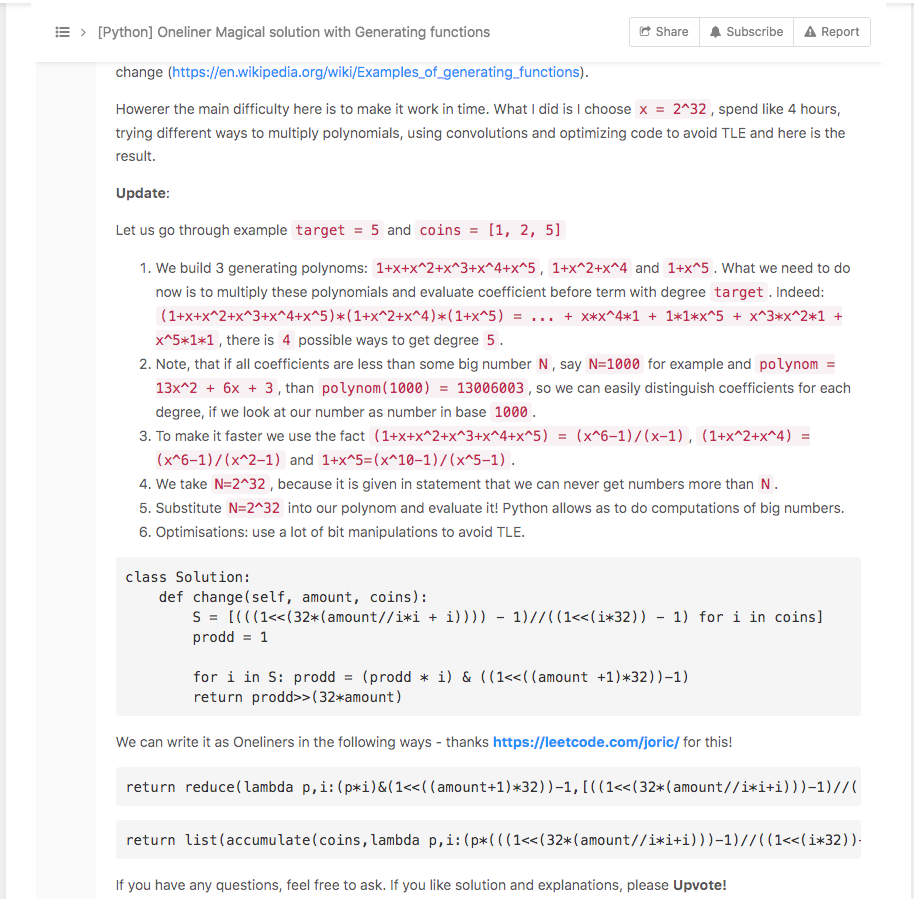

In [0]:
""" June 07 Coin Change 2 * DYnamic programming
"""
# https://leetcode.com/explore/challenge/card/june-leetcoding-challenge/539/week-1-june-1st-june-7th/3353/discuss/674977/100-Faster-or-Recursive-1-d-2-d-DP-or-Matrix-With-Example-or-Commented-Code-Video

class Solution:
    def change(self, amount: int, coins: List[int]) -> int:
        dp = [ 0 for i in range(amount+1)]
        dp[0] = 1
        
        for coin in coins:
            
            for i in range(coin,amount+1):
                dp[i] += dp[i-coin]
        
        
        return dp[-1]


In [0]:
""" June 8, Power of Two 
Given an integer, write a function to determine if it is a power of two.
Input: 1
Output: true 
Explanation: 20 = 1

Input: 16
Output: true
Explanation: 24 = 16

Input: 218
Output: false
"""
# My solution 28 ms
class Solution:
    def isPowerOfTwo(self, n: int) -> bool: 
        bin_str = str(bin(n))[2:] + '0'   
        if bin_str[:1] == '1' and int(bin_str[1:], 2) == 0:
            return True
        else:
            False

# 12ms solution 
class Solution:
    def isPowerOfTwo(self, n: int) -> bool:
        if n == 1:
            return True
        i = 2
        while i <= n:
            if i == n:
                return True
            i *= 2
        return False

# 16 ms
class Solution:
    def isPowerOfTwo(self, n: int) -> bool:
        return (n and not (n & (n - 1)))

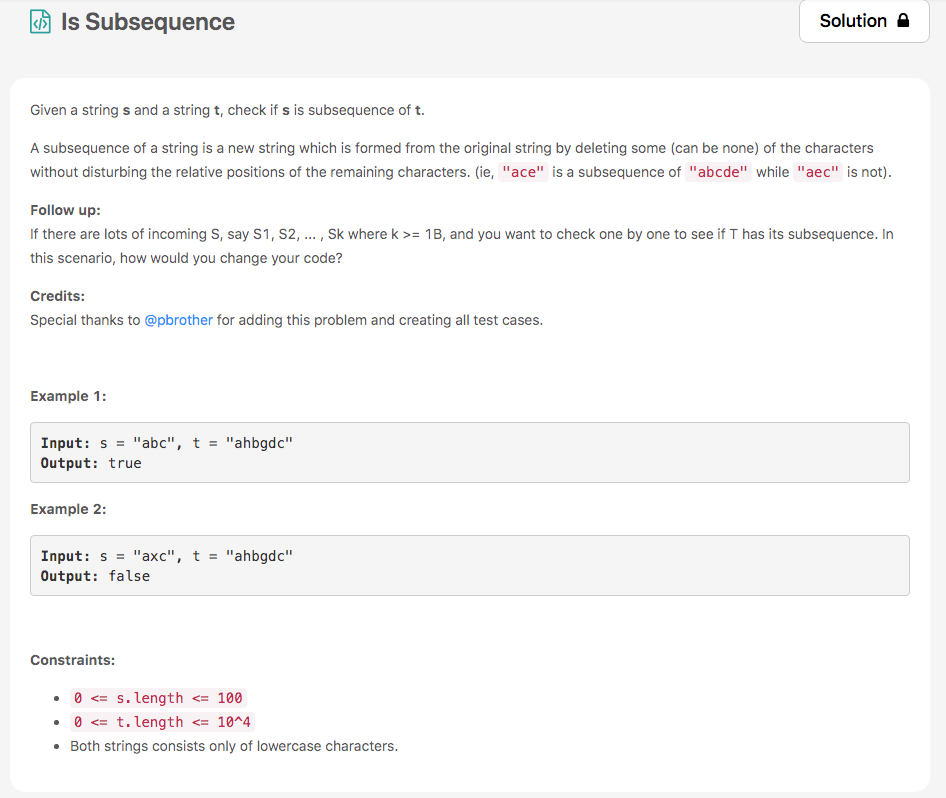

In [0]:
''' June 9, is subsequence 
'''
# My answer  32 ms
class Solution:
    def isSubsequence(self, s: str, t: str) -> bool:
        i, leng_s = 0, len(s)
        if leng_s == 0:
            return True 

        for char in t:
            if char == s[i] and i <= len(s):
                leng_s -= 1
                i += 1
                if leng_s == 0:
                    return True    
                
        return False
      

# fastest solution  16ms solution 
class Solution:
    def isSubsequence(self, s, target):
        iter_target = iter(target) # what is iter and all ?
        return all(char in iter_target for char in s)

# 20 ms solution

class Solution:
    def isSubsequence(self, s: str, t: str) -> bool:
        queue = collections.deque(s)
        for c in t:
            if not queue: return True
            if c == queue[0]:
                queue.popleft()
        return not queue

In [0]:
# june 10 search insert position
'''Search Insert Position
Solution
Given a sorted array and a target value, return the index if the target is found. 
If not, return the index where it would be if it were inserted in order.
You may assume no duplicates in the array.

Input: [1,3,5,6], 5
Output: 2

Input: [1,3,5,6], 2
Output: 1

Input: [1,3,5,6], 7
Output: 4

Input: [1,3,5,6], 0
Output: 0'''
# phone solution, fk close to my solution
class Solution:
    def searchInsert(self, nums: List[int], target: int) -> int:
        
        l,r = 0, len(nums)
        # iterate until l > r, or l or r move outside array
        while l <= r and l < len(nums) and r >= 0:
            mid = (l + r)//2
            if nums[mid] == target:
                return mid 
            if nums[mid] > target:
                r = mid - 1
            else:
                l = mid + 1
      
        return l   


# fastest solution
class Solution:
    def searchInsert(self, nums: List[int], target: int) -> int:
      lo, hi = 0, len(nums) - 1
      while lo < hi:
        mid = (lo + hi) // 2
        if nums[mid] == target:
          return mid
        elif nums[mid] < target:
          lo = mid + 1
        else:
          hi = mid
      if lo == len(nums) - 1 and target > nums[-1]:
        return len(nums) 
      return lo

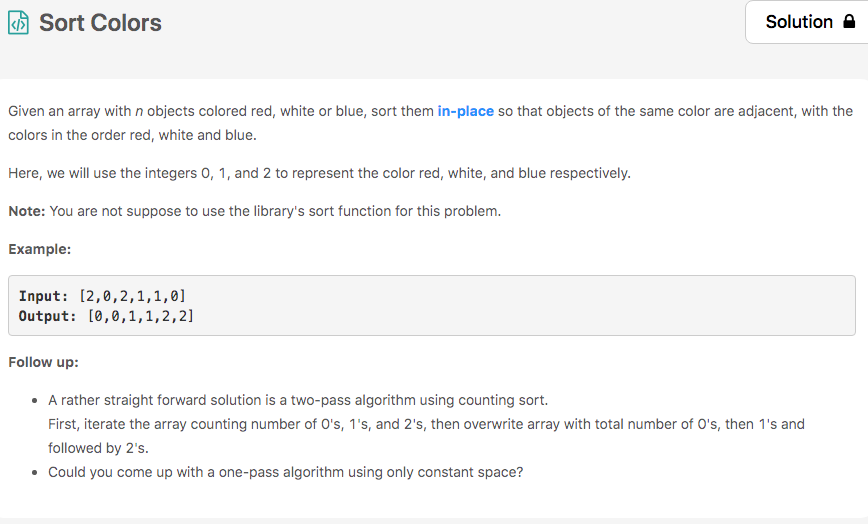

In [0]:
# June 11. Sort color, how to sort in place 
# My solution, use extra memory 32 ms
class Solution:
    def sortColors(self, nums: List[int]) -> None:
        """
        Do not return anything, modify nums in-place instead.
        """
        mydict = collections.Counter(nums)
        pointer = 0
        for i in range(3):
            nums[pointer:pointer+ mydict[i]] = [i for num in range(mydict[i])] 
            print(nums)
            pointer += mydict[i]

### sort in place

class Solution:
    def sortColors(self, nums: List[int]) -> None:
        """
        Do not return anything, modify nums in-place instead.
        """ 
        p1 = 0
        curr = 0
        p2 = len(nums) - 1
        
        while curr <= p2:
            if nums[curr] == 0:
                nums[p1], nums[curr] = nums[curr], nums[p1]
                p1 += 1
                curr += 1
            elif nums[curr] == 2:
                nums[curr], nums[p2] = nums[p2], nums[curr]
                p2 -= 1
            else:
                curr += 1

''' Note for understanding
our input
[2,0,2,1,1,0]
Your stdout
0 0 5
[2, 0, 2, 1, 1, 0]
0 0 4
[0, 0, 2, 1, 1, 2]
1 1 4
[0, 0, 2, 1, 1, 2]
2 2 4
[0, 0, 2, 1, 1, 2]
2 2 3
[0, 0, 1, 1, 2, 2]
2 3 3
[0, 0, 1, 1, 2, 2]

 '''

class Solution:
    def sortColors(self, nums: List[int]) -> None:
        """
        Do not return anything, modify nums in-place instead.
        """
        p_0, p_1 = 0,0
        p_2 = len(nums) -1 
        
        while p_1 <= p_2:
            print(p_0, p_1, p_2)
            print(nums)
            if nums[p_1] == 1:
                p_1 += 1
            elif nums[p_1] == 0:
                nums[p_0], nums[p_1] = nums[p_1], nums[p_0]
                p_0 +=1
                p_1 +=1 
            else:
                nums[p_2], nums[p_1] = nums[p_1], nums[p_2]
                p_2 -=1
            

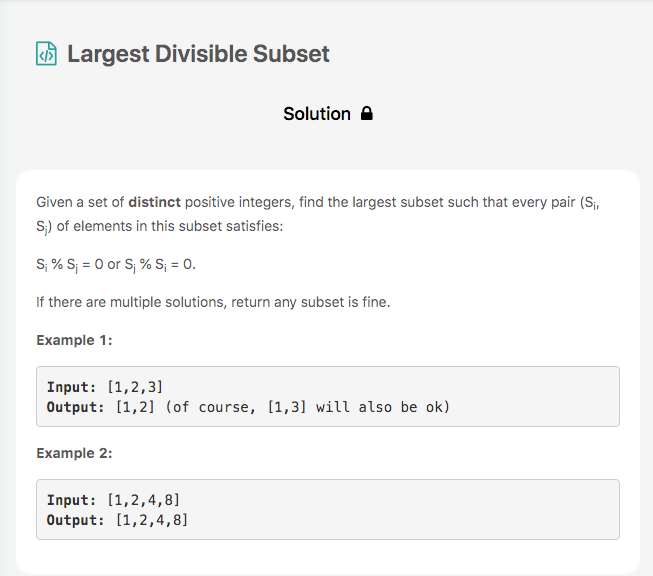

In [0]:
# June 13 Phone Solution 392 ms
''' For each num starting with smallest , create a set where every pair is divisable
Search through all existing sets. To find the largest where num is divisible by its largest 
element therefor num is divisible by all of its elements 
Time - O(n**2)
Space O(n)
'''
class Solution:
    def largestDivisibleSubset(self, nums: List[int]) -> List[int]:
        # Mapping from the largets value in a set to its elements
        MaxToSet = { -1 : set()}
        nums.sort()
        
        for num in nums:
            # the set that has num as its largest value
            num_set = set()
            for max_in_s, s in MaxToSet.items():
                if num % max_in_s == 0 and len(s) > len(num_set):
                    num_set = s
            # put the num in the set
            MaxToSet[num] = num_set | {num}
            
        print(MaxToSet)
        # return max set by length   
        return list(max(MaxToSet.values(), key = len))




# Dynamic Programming
class Solution:
    def largestDivisibleSubset(self, nums: List[int]) -> List[int]:
        '''
        sort nums
        dynamic programming:
        dp = {}   key--num  val--length of largest divisible subset ending with num
        dp[num] = max(dp[x] num%x==0, x in nums) + 1
        
        reconstruct the result list
        max_len = max(dp.values)  -- find the num 
        
        '''
        if not nums or  len(nums) == 0:
            return []
        nums = sorted(nums)
        dp = {}
        for i in range(len(nums)):
            if nums[i] == 1:
                dp[1] = 1
                continue
            
            for j in range(1, int(sqrt(nums[i]))+1):
                tmp = nums[i] %  j
                if tmp == 0:
                    dp[nums[i]] = max(dp.get(j, 0) + 1, dp.get(nums[i]//j, 0) + 1, dp.get(nums[i], 1))
                    
        
        #  reconstruct the result
        rs  = list()
        max_len =  max(dp.values())
        while max_len > 0:
            for x in dp:
                if dp[x] == max_len:
                    rs.append(x)
                    break
            max_len -= 1
        return rs[::-1]



# 112 ms
class Solution:
    def largestDivisibleSubset(self, nums: List[int]) -> List[int]:
        if not nums or  len(nums) == 0:
            return []
        nums = sorted(nums)
        dp = {}
        for i in range(len(nums)):
            if nums[i] == 1:
                dp[1] = 1
                continue
            
            for j in range(1, int(sqrt(nums[i]))+1):
                tmp = nums[i] %  j
                if tmp == 0:
                    dp[nums[i]] = max(dp.get(j, 0) + 1, dp.get(nums[i]//j, 0) + 1, dp.get(nums[i], 1))
                    
        
        #  reconstruct the result
        rs  = []
        max_len =  max(dp.values())
        while max_len > 0:
            for x in dp:
                if dp[x] == max_len:
                    rs.append(x)
                    break
            max_len -= 1
        return rs[::-1]

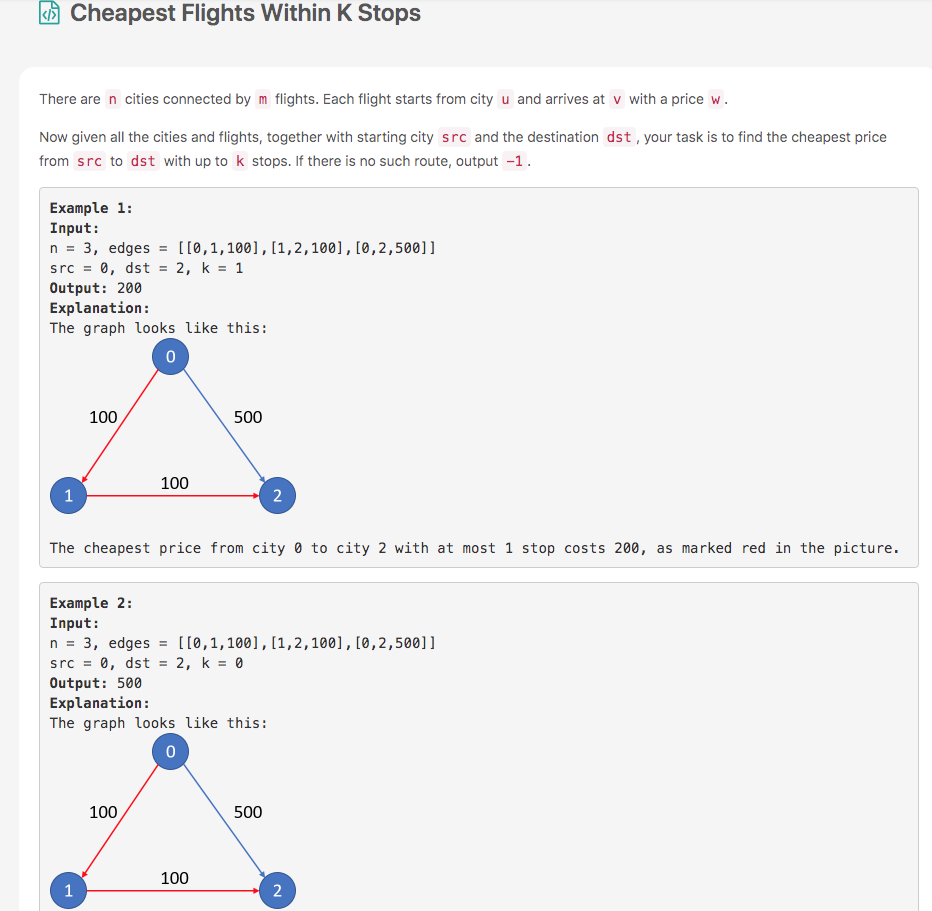

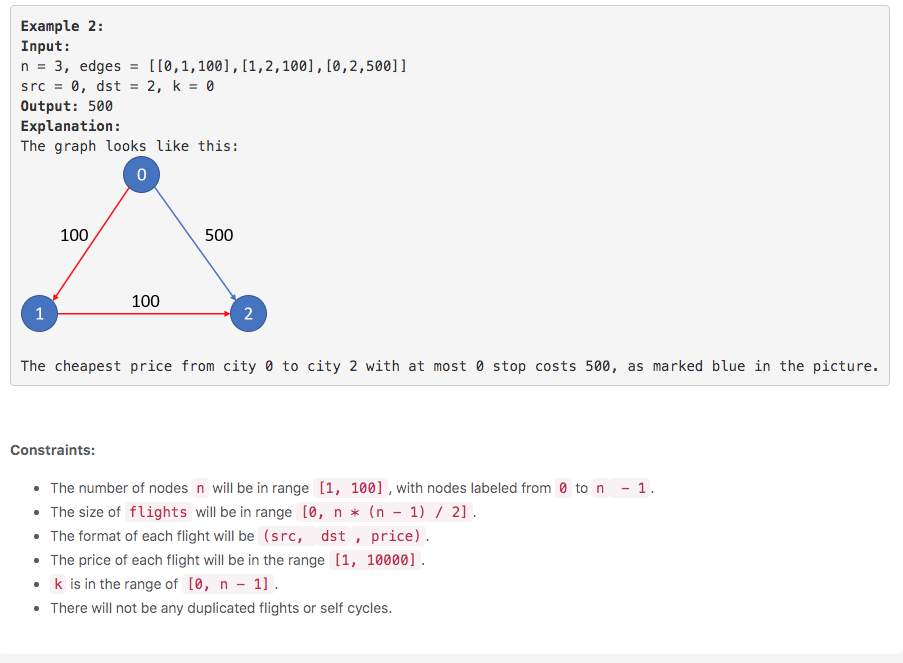

In [0]:
''' June 14th. Cheapest Flights Within K Stops, 108 ms

https://www.youtube.com/watch?v=UbP2Zek1c48
'''

class Solution:
    def findCheapestPrice(self, n: int, flights: List[List[int]], src: int, dst: int, K: int) -> int:
        # map city to list of (dest, price)
        graph = defaultdict(list) 
        
        for start, end, price in flights:
            graph[start].append((end,price))
            
        queue = collections.deque([(src, 0, 0)])   # -1 stops since zero stops are direct flights
        minCost = float('inf')
        
        while queue:
            location, stops, Price = queue.popleft()
            
            if location == dst:
                minCost = min(minCost,Price)
                continue
            
            if stops > K or Price > minCost:
                continue 
                
            for end, next_cost in graph[location]:
                queue.append((end, stops +1, Price + next_cost))
          
        return minCost if minCost != float('inf') else -1





# sample 64 ms submission

from collections import defaultdict
class Solution:
    def findCheapestPrice(self, n: int, flights: List[List[int]], src: int, dst: int, K: int) -> int:
         # Build the adjacency matrix
        graph = defaultdict(list)
        for s, d, w in flights:
            graph[s].append((d, w))
            
        # Shortest distances array
        distances = [float("inf") for _ in range(n)]
        current_stops = [float("inf") for _ in range(n)]
        distances[src], current_stops[src] = 0, 0
        
        # Data is (cost, stops, node)
        minHeap = [(0, 0, src)]     
        
        while minHeap:
            
            cost, stops, node = heapq.heappop(minHeap)
            
            # If destination is reached, return the cost to get here
            if node == dst:
                return cost
            
            # If there are no more steps left, continue 
            if stops == K + 1:
                continue
             
            # Examine and relax all neighboring edges if possible 
            for nei, price in graph[node]:
                dU, dV, wUV = cost, distances[nei], price
                    
                    # Better cost?
                if dU + wUV < dV:
                    distances[nei] = dU + wUV
                    heapq.heappush(minHeap, (dU + wUV, stops + 1, nei))
                elif stops < current_stops[nei]:

                    #  Better steps?
                    current_stops[nei] = stops
                    heapq.heappush(minHeap, (dU + wUV, stops + 1, nei))

        return -1 if distances[dst] == float("inf") else distances[dst]

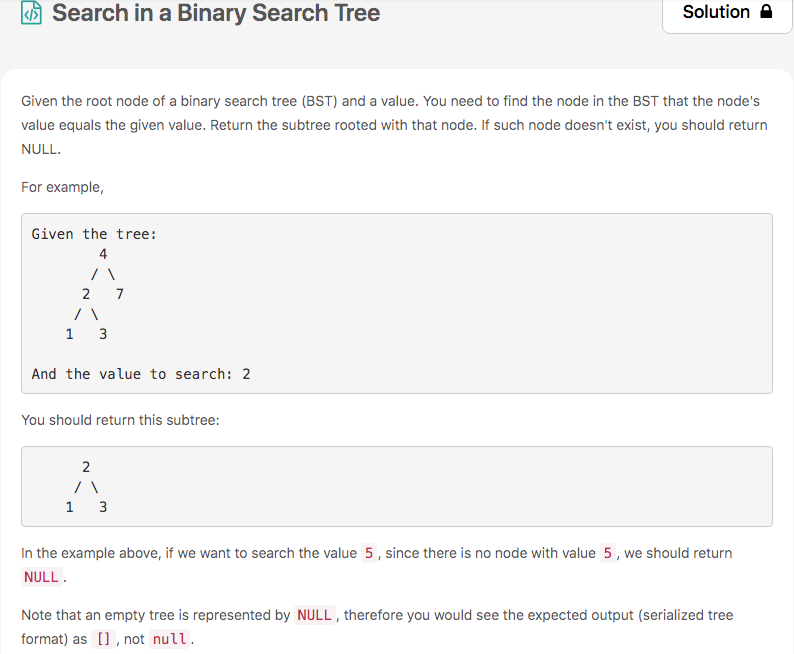

In [0]:
### Leet code June 15

# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def searchBST(self, root: TreeNode, val: int) -> TreeNode:
        
        def FindNode(node:TreeNode, val:int) -> TreeNode:
            if not node:
                return None
            if node.val == val:
                return node
            
            if val > node.val:
                return FindNode(node.right,val)
            return FindNode(node.left,val)
        
        return FindNode(root,val)

""" 56 ms submission """

# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def searchBST(self, root: TreeNode, val: int) -> TreeNode:
        if not root: return
        if root.val == val: return root
        elif root.val > val: return self.searchBST(root.left,val)
        else: return self.searchBST(root.right,val)

In [0]:
'''June 16 valid Ip address
https://leetcode.com/articles/validate-ip-address/


''' 
# My solution using reg
class Solution:
    def validIPAddress(self, IP: str) -> str:
            chunk_IPv4 = r'([0-9]|[1-9][0-9]|1[0-9][0-9]|2[0-4][0-9]|25[0-5])'
            IPv4 = re.compile(r'^(' + chunk_IPv4 + r'\.){3}' + chunk_IPv4 + r'$')
    
            chunk_IPv6 = r'([0-9a-fA-F]{1,4})'
            IPv6 = re.compile(r'^(' + chunk_IPv6 + r'\:){7}' + chunk_IPv6 + r'$')
            if IPv4.match(IP):
                return "IPv4"
            if IPv6.match(IP):
                return "IPv6"
            return "Neither"
            
    # Using built-in function   
    # from ipaddress import ip_address, IPv6Address
    #     ret = ['IPv4','IPv6','Neither']
    #     try:
    #         return ret[1] if type(ip_address(IP)) is IPv6Address else ret[0]
    #     except ValueError:
    #         return ret[-1]


# fastest soluion 12 ms

import re

class Solution:
    def validIPAddress(self, IP: str) -> str:
        def valid_ipv4():
            octets = IP.split('.')
            if len(octets) != 4:
                return False
            
            for octet in octets:
                if not octet.isdigit():
                    return False
                if len(octet) > 1 and octet[0] == '0':
                    return False
                try:
                    if int(octet) > 255:
                        return False
                except ValueError:
                    return False
            return True
                
        def valid_ipv6():
            parts = IP.split(':')
            if len(parts) != 8:
                return False
            
            for part in parts:
                if not part or len(part) > 4:
                    return False
                
                if not re.match('[0-9a-fA-F]', part):
                    return False
                
                try:
                    int(part, 16)
                except ValueError:
                    return False
            return True
        
        if ':' in IP:
            return "IPv6" if valid_ipv6() else "Neither"
        return "IPv4" if valid_ipv4() else "Neither"

In [0]:
''' divide and conquer.

Algorithm

1. For the IPv4 address, we split IP into four chunks by the delimiter ., while for IPv6 address,
 we split IP into eight chunks by the delimiter :.

2. For each substring of "IPv4" address, we check if it is an integer between 0 - 255, 
and there is no leading zeros.

3. For each substring of "IPv6" address, we check if it's a hexadecimal number of length 1 - 4.'''

class Solution:
    def validate_IPv4(self, IP: str) -> str:
        nums = IP.split('.')
        for x in nums:
            # Validate integer in range (0, 255):
            # 1. length of chunk is between 1 and 3
            if len(x) == 0 or len(x) > 3:
                return "Neither"
            # 2. no extra leading zeros
            # 3. only digits are allowed
            # 4. less than 255
            if x[0] == '0' and len(x) != 1 or not x.isdigit() or int(x) > 255:
                return "Neither"
        return "IPv4"
    
    def validate_IPv6(self, IP: str) -> str:
        nums = IP.split(':')
        hexdigits = '0123456789abcdefABCDEF'
        for x in nums:
            # Validate hexadecimal in range (0, 2**16):
            # 1. at least one and not more than 4 hexdigits in one chunk
            # 2. only hexdigits are allowed: 0-9, a-f, A-F
            if len(x) == 0 or len(x) > 4 or not all(c in hexdigits for c in x):
                return "Neither"
        return "IPv6"
        
    def validIPAddress(self, IP: str) -> str:
        if IP.count('.') == 3:
            return self.validate_IPv4(IP)
        elif IP.count(':') == 7:
            return self.validate_IPv6(IP)
        else:
            return "Neither"